In [1]:
import numpy as np
import pandas as pd
import astropy.io.fits as pyfits
import os
import sys
import glob

%matplotlib inline
import matplotlib.pyplot as plt

import ROOT

Welcome to JupyROOT 6.26/04


Read the root event file

In [29]:
outfilename = "scorefile.root"
ROOT.gROOT.Reset()
f = ROOT.TFile(outfilename)

tree = f.Get("Events")
tree_len = tree.GetEntries()

t_ID = np.zeros(tree_len, dtype=int)
t_ED = np.zeros(tree_len, dtype=float)
t_SI = np.zeros(tree_len, dtype=int)
t_XP = np.zeros(tree_len, dtype=float)
t_YP = np.zeros(tree_len, dtype=float)
t_ZP = np.zeros(tree_len, dtype=float)
t_TP = np.zeros(tree_len, dtype=float)
t_PP = np.zeros(tree_len, dtype=float)
t_EP = np.zeros(tree_len, dtype=float)
t_TI = np.zeros(tree_len, dtype=float)
t_Dx = np.zeros(tree_len, dtype=float)
t_Dy = np.zeros(tree_len, dtype=float)
t_Dz = np.zeros(tree_len, dtype=float)

for i, entry in enumerate(tree):
    t_ID[i] = entry.EventID
    t_ED[i] = entry.En_dep
    t_SI[i] = entry.Scint_ID
    t_XP[i] = entry.X_Primary
    t_YP[i] = entry.Y_Primary
    t_ZP[i] = entry.Z_Primary
    t_TP[i] = entry.Theta_Primary
    t_PP[i] = entry.Phi_Primary
    t_EP[i] = entry.En_Primary
    t_TI[i] = entry.Event_time
    t_Dx[i] = entry.X_Detected
    t_Dy[i] = entry.Y_Detected
    t_Dz[i] = entry.Z_Detected

Print some value

In [30]:
print('Nr of records: {}'.format(len(t_ID)))
print('Some x positions for the detector (first 50): {}'.format(t_Dx[0:49]))

Nr of records: 84799
Some x positions for the detector (first 50): [-10.61415195  -1.91415213 -10.61415195 -10.61415195 -10.61415195
 -10.61415195 -28.61415195 -10.61415195 -10.61415195  -1.91415213
 -10.61415195 -27.23915291 -10.61415195 -10.61415195 -10.61415195
 -10.61415195 -10.61415195 -32.96415138 -37.31415176  -1.91415213
 -10.61415195 -10.61415195 -14.96415234 -10.61415195 -10.61415195
 -14.96415234 -10.61415195 -10.61415195 -10.61415195 -10.61415195
 -10.61415195 -10.61415195 -10.61415195 -10.61415195 -10.61415195
 -10.61415195 -10.61415195 -10.61415195 -10.61415195 -10.61415195
 -10.61415195 -10.61415195 -10.61415195 -10.61415195 -10.61415195
 -10.61415195 -10.61415195 -10.61415195 -10.61415195]


Create a pandas data frame

In [31]:
data = {'EventID': t_ID, 'En_dep': t_ED, 'Scint_ID': t_SI, 'X_Primary': t_XP, 'Y_Primary': t_YP, 'Z_Primary': t_ZP,
        'Theta_Primary': t_TP, 'Phi_Primary': t_PP, 'En_Primary': t_EP, 'Event_time': t_TI, 'X_Detected': t_Dx,
       'Y_Detected': t_Dy, 'Z_Detected': t_Dz}
df = pd.DataFrame(data)
df

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,Event_time,X_Detected,Y_Detected,Z_Detected
0,1,59.982440,7,-1.133977,-1.014597,-8.0,180.0,0.0,60.0,0.0,-10.614152,-9.383992,-32.883976
1,5,9.888921,15,-1.137570,-0.945447,-8.0,180.0,0.0,60.0,0.0,-1.914152,-9.383992,-32.883976
2,5,0.104848,7,-1.137570,-0.945447,-8.0,180.0,0.0,60.0,0.0,-10.614152,-9.383992,-32.883976
3,6,59.973460,7,-0.996348,-0.904025,-8.0,180.0,0.0,60.0,0.0,-10.614152,-9.383992,-32.883976
4,7,1.069391,7,-1.150461,-0.876174,-8.0,180.0,0.0,60.0,0.0,-10.614152,-9.383992,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84794,119991,0.573678,7,-1.157906,-0.854189,-8.0,180.0,0.0,60.0,0.0,-10.614152,-9.383992,-32.883976
84795,119992,8.245106,7,-1.116561,-1.011349,-8.0,180.0,0.0,60.0,0.0,-10.614152,-9.383992,-32.883976
84796,119993,0.504658,7,-1.108425,-0.905352,-8.0,180.0,0.0,60.0,0.0,-10.614152,-9.383992,-32.883976
84797,119996,0.363136,4,-1.115997,-0.877929,-8.0,180.0,0.0,60.0,0.0,-14.964152,-13.733992,-32.883976


In [32]:
# Group by ''EventID' column 
grouped = df.groupby('EventID')

# Perform aggregation
sum_by_category = grouped['En_dep'].sum()

sum_by_category

EventID
1         59.982440
5          9.993769
6         59.973460
7          1.069391
8          8.099145
            ...    
119989     2.256332
119991     0.573678
119992     8.245106
119993     0.504658
119996     4.266936
Name: En_dep, Length: 68671, dtype: float64

Plot the spectrum

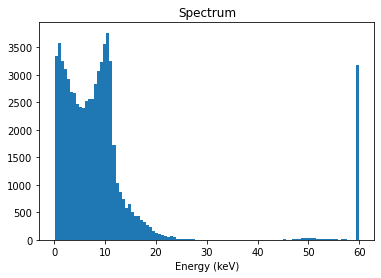

In [33]:
plt.hist(sum_by_category, bins=100);
plt.title('Spectrum');
plt.xlabel('Energy (keV)');